# Data structuring

In [197]:
# Loading packages

import requests
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
# Load df from disk

df = pd.read_csv("speeches/data.csv")

In [199]:
df.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019","\r\n \r\n \r\nMadam Speaker, Mr. Vic...",State of the Union,Republican
1,1,Donald Trump,"January 30, 2018","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Republican
2,2,Donald Trump,"January 20, 2017","\r\n \r\n Chief Justice Roberts, Pre...",Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat


In [200]:
len(df)

250

In [201]:
df["Speech"] = df["Speech"].str.replace("transcript-inner", "").str.replace(u'\xa0', u' ')

In [202]:
print(df['Speech'].loc[9])


      
      Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests, and fellow Americans:

      Tonight I want to begin by congratulating the men and women of the 112th Congress, as well as your new Speaker, John Boehner.  (Applause.)  And as we mark this occasion, we’re also mindful of the empty chair in this chamber, and we pray for the health of our colleague -- and our friend -– Gabby Giffords.  (Applause.)

      It’s no secret that those of us here tonight have had our differences over the last two years.  The debates have been contentious; we have fought fiercely for our beliefs.  And that’s a good thing.  That’s what a robust democracy demands.  That’s what helps set us apart as a nation.

      But there’s a reason the tragedy in Tucson gave us pause. Amid all the noise and passion and rancor of our public debate, Tucson reminded us that no matter who we are or where we come from, each of us is a part of something greater -– something more consequential 

In [203]:
# drops party orientation that isn't Rep or Dem
df2 = df.drop(df.index[172:250])

In [204]:
df2.head()

,Unnamed: 0,Name,Date,Speech,Type,Party
0,0,Donald Trump,"February 05, 2019","\r\n \r\n \r\nMadam Speaker, Mr. Vic...",State of the Union,Republican
1,1,Donald Trump,"January 30, 2018","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Republican
2,2,Donald Trump,"January 20, 2017","\r\n \r\n Chief Justice Roberts, Pre...",Inaugural Address,Republican
3,3,Barack Obama,"January 12, 2016","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat
4,4,Barack Obama,"January 20, 2015","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat


In [205]:
# creates party dummy
Party_dummy = pd.get_dummies(df2['Party'], drop_first=True)
# Party_dummy

In [206]:
df2['Republican'] = Party_dummy

In [207]:
df2.head()
print(len(df2))

172


In [208]:
#Number of words in each speech
df2["word_count"] = df2["Speech"].apply(lambda x : len(x))
#Number of unique words in each speech
df2["unique_word"] = df2["Speech"].apply(lambda x : len(set(x.lower().split()) ) )
#Number of unique words ratio in each speech
df2["unique_word_ratio"] = df2.apply(lambda x : x["unique_word"]/x["word_count"] ,axis=1)
#Extracting year alone from the Date column
df2["year"] = df2["Date"].apply(lambda x : int(x.split(",")[2])  if len(x.split(","))==3 else int(x.split(",")[1]) )
df2.head()

,Unnamed: 0,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year
0,0,Donald Trump,"February 05, 2019","\r\n \r\n \r\nMadam Speaker, Mr. Vic...",State of the Union,Republican,1,30948,1909,0.061684,2019
1,1,Donald Trump,"January 30, 2018","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Republican,1,30540,1905,0.062377,2018
2,2,Donald Trump,"January 20, 2017","\r\n \r\n Chief Justice Roberts, Pre...",Inaugural Address,Republican,1,8551,621,0.072623,2017
3,3,Barack Obama,"January 12, 2016","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,35410,1930,0.054504,2016
4,4,Barack Obama,"January 20, 2015","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,40477,2067,0.051066,2015


In [209]:
print(df2['Party'])

0      Republican
1      Republican
2      Republican
3        Democrat
4        Democrat
5        Democrat
6        Democrat
7        Democrat
8        Democrat
9        Democrat
10       Democrat
11       Democrat
12     Republican
13     Republican
14     Republican
15     Republican
16     Republican
17     Republican
18     Republican
19     Republican
20     Republican
21       Democrat
22       Democrat
23       Democrat
24       Democrat
25       Democrat
26       Democrat
27       Democrat
28     Republican
29     Republican
          ...    
142    Republican
143    Republican
144    Republican
145    Republican
146    Republican
147    Republican
148    Republican
149    Republican
150    Republican
151    Republican
152    Republican
153    Republican
154    Republican
155    Republican
156    Republican
157    Republican
158    Republican
159    Republican
160    Republican
161    Republican
162      Democrat
163      Democrat
164      Democrat
165      Democrat
166      D

Text(0, 0.5, 'Word count')

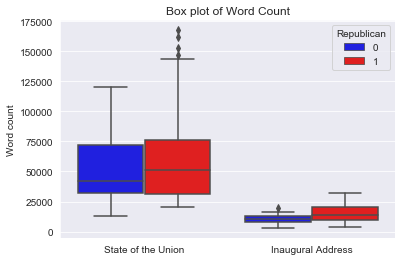

In [210]:

sns.set_style("darkgrid")
ax = sns.boxplot(x='Type', y="word_count", orient='v', hue='Republican', data=df2, palette = ['blue', 'red'])
plt.title("Box plot of Word Count")
plt.xlabel("")
plt.ylabel("Word count")

In [211]:
max(df2['word_count'])
min(df2['word_count'])

3027

In [212]:
# Trying to make to new dataframes; one with InAug speeches and one 
# with State.

#df_inaug = []
#df_state = []

#for speech in df2['Type']:
 #   if 'Type'=='Inaugural Address':
  #      df_inaug.append
   # else:
    #    df_state.append


#df_by_speech = df2.groupby('Type').head()

#df_inaug = [g for _, g in df2.groupby('Type'=='Inaugural Address')]
#df_state = [g for _, g in df2.groupby('Type'=='State of the Union')]

In [213]:
#df_inaug = df_by_speech['Type'=='Inaugural Adress']
#df_inaug
#print(len(df_inaug))
#df_state = df_by_speech['Type'=='State of the Union']
#print(len(df_state))

In [214]:
# state of the union dataset
df_speech_des = df2.groupby('Type').describe().head()

In [215]:
df_speech_des.head()

Unnamed: 0                                                \
                        count       mean        std  min   25%   50%    75%   
Type                                                                          
Inaugural Address        39.0  83.692308  48.086082  2.0  52.0  73.0  122.5   
State of the Union      133.0  86.030075  50.451888  0.0  40.0  89.0  129.0   

                          Republican            ... unique_word_ratio  \
                      max      count      mean  ...               75%   
Type                                            ...                     
Inaugural Address   171.0       39.0  0.589744  ...          0.074271   
State of the Union  170.0      133.0  0.646617  ...          0.054696   

                               year                                          \
                         max  count         mean        std     min     25%   
Type                                                                          
Inaugural Address   0.093575   39.0  1931.358974  48.806539  1853.0  1891.0   
State of the Union  0.067571  133.0  1929.293233  51.919924  1853.0  1887.0   

                                            
                       50%     75%     max  
Type                                        
Inaugural Address   1929.0  1971.0  2017.0  
State of the Union  1916.0  1981.0  2019.0  

[2 rows x 48 columns]

In [216]:
#df_speech_des['word_count']
#with open('mytable.tex','w') as tf:
 #   tf.write(df_by_speech.to_latex())

Text(-12.575000000000003, 0.5, '')

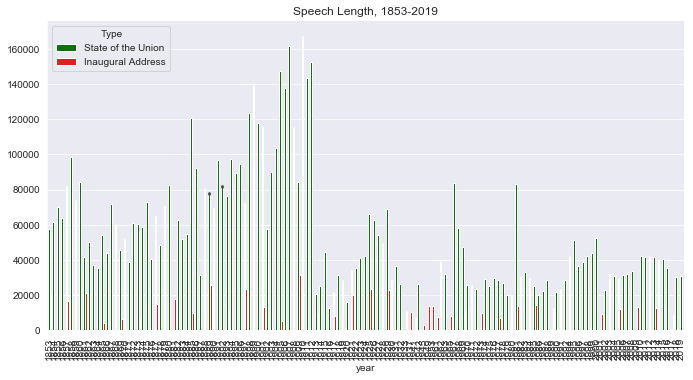

In [217]:
sns.set_style("darkgrid")

timeline = sns.catplot(x="year",y="word_count",hue="Type",data=df2,kind="bar",height=5,aspect=2,legend_out=False, palette=['green','red'])
timeline.set_xticklabels(rotation=90)
plt.title("Speech Length, 1853-2019")
plt.ylabel("")
#plt.figure(figsize=(20,70))

# Text analysis

In [218]:
# Download positive and negative sentiment lexicons, split into words and convert to set representation. 
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';\n')[-1].split('\n'))
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';\n')[-1].split('\n'))
print(len(negative),len(positive))

4784 2007


In [219]:
# initialize tokenizer
#import nltk
#nltk.download('punkt')

from nltk import sent_tokenize, word_tokenize
#tokenizer = sent_tokenize

In [220]:
# define function
def sent_preproc(string):
    return sent_tokenize(string.lower())

In [221]:
def word_preproc(string):
    return word_tokenize(string.lower())

In [222]:
# apply function
sentences = df2.Speech.apply(sent_preproc)

In [223]:
words = df2.Speech.apply(word_preproc)

In [224]:
sentences.head()

0    [\r\n      \r\n      \r\nmadam speaker, mr. vi...
1    [\r\n      \r\n      mr. speaker, mr. vice pre...
2    [\r\n      \r\n      chief justice roberts, pr...
3    [\r\n      \r\n      mr. speaker, mr. vice pre...
4    [\r\n      \r\n      mr. speaker, mr. vice pre...
Name: Speech, dtype: object

In [225]:
words.head()

0    [madam, speaker, ,, mr., vice, president, ,, m...
1    [mr., speaker, ,, mr., vice, president, ,, mem...
2    [chief, justice, roberts, ,, president, carter...
3    [mr., speaker, ,, mr., vice, president, ,, mem...
4    [mr., speaker, ,, mr., vice, president, ,, mem...
Name: Speech, dtype: object

In [226]:
# Defines function for counting number of matches with pos/neg words
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

In [227]:
df2['positive_words'] = words.apply(count_dictionary,dictionary=positive)
df2['negative_words'] = words.apply(count_dictionary,dictionary=negative)

In [228]:
# positive and negative words to total words ration
df2["positive_words_ratio"] = df2['positive_words']/df2['word_count']
df2["negative_words_ratio"] = df2['negative_words']/df2['word_count']

In [229]:
df2["words"]=words
df2["sentences"]=sentences

In [230]:
df2.to_csv(index=False)
df2.drop('Unnamed: 0', axis = 1)

,Name,Date,Speech,Type,Party,Republican,word_count,unique_word,unique_word_ratio,year,positive_words,negative_words,positive_words_ratio,negative_words_ratio,words,sentences
0,Donald Trump,"February 05, 2019","\r\n \r\n \r\nMadam Speaker, Mr. Vic...",State of the Union,Republican,1,30948,1909,0.061684,2019,226,159,0.007303,0.005138,"[madam, speaker, ,, mr., vice, president, ,, m...","[\r\n \r\n \r\nmadam speaker, mr. vi..."
1,Donald Trump,"January 30, 2018","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Republican,1,30540,1905,0.062377,2018,232,132,0.007597,0.004322,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."
2,Donald Trump,"January 20, 2017","\r\n \r\n Chief Justice Roberts, Pre...",Inaugural Address,Republican,1,8551,621,0.072623,2017,77,26,0.009005,0.003041,"[chief, justice, roberts, ,, president, carter...","[\r\n \r\n chief justice roberts, pr..."
3,Barack Obama,"January 12, 2016","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,35410,1930,0.054504,2016,276,145,0.007794,0.004095,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."
4,Barack Obama,"January 20, 2015","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,40477,2067,0.051066,2015,299,162,0.007387,0.004002,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."
5,Barack Obama,"January 28, 2014","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,40205,2166,0.053874,2014,304,133,0.007561,0.003308,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."
6,Barack Obama,"February 13, 2013","\r\n \r\n \r\nMr. Speaker, Mr. Vice ...",State of the Union,Democrat,0,41416,2098,0.050657,2013,324,124,0.007823,0.002994,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n \r\nmr. speaker, mr. vice..."
7,Barack Obama,"January 21, 2013","\r\n \r\n \r\nVice President Biden, ...",Inaugural Address,Democrat,0,12489,867,0.069421,2013,102,48,0.008167,0.003843,"[vice, president, biden, ,, mr., chief, justic...","[\r\n \r\n \r\nvice president biden,..."
8,Barack Obama,"January 24, 2012","\r\n \r\n Mr. Speaker, Mr. Vice Pre...",State of the Union,Democrat,0,42443,2106,0.049619,2012,300,147,0.007068,0.003463,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pr..."
9,Barack Obama,"January 25, 2011","\r\n \r\n Mr. Speaker, Mr. Vice Pres...",State of the Union,Democrat,0,41939,2082,0.049644,2011,283,103,0.006748,0.002456,"[mr., speaker, ,, mr., vice, president, ,, mem...","[\r\n \r\n mr. speaker, mr. vice pre..."


In [231]:
def count_word(array, word):
    return array.count(word)

df2['we_count'] = df2.words.apply(lambda a: count_word(a, 'we'))
df2['hello_count'] = df2.words.apply(lambda a: count_word(a, 'hello'))

## Positive and negative words

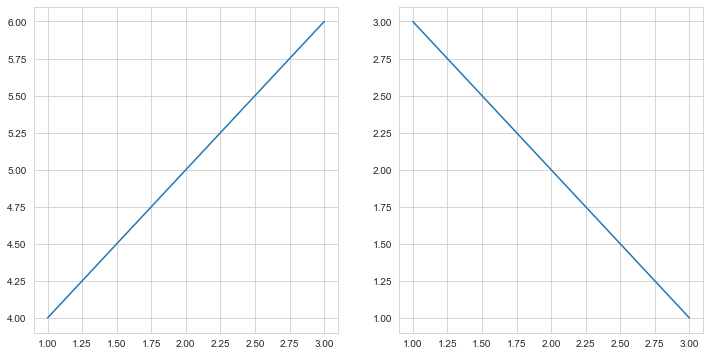

In [233]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))

ax[0].plot([1,2,3], [4,5,6])
ax[1].plot([1,2,3], [3,2,1])

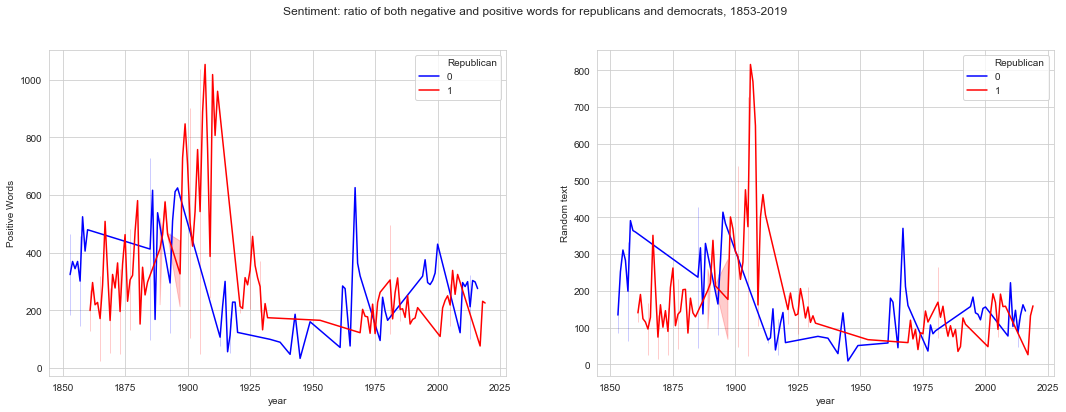

In [242]:
# SOMETHNG IS WRONG WITH THIS GRAPH !! 
# plotting positive and negative words against each other 
import seaborn as sns; sns.set_style("whitegrid")
import matplotlib as mpl

mpl.rcParams['lines.color'] = 'red'

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1,2, figsize = (18,6))

sentiment = sns.lineplot(x="year",y="positive_words", hue='Republican', data=df2, palette = ['blue', 'red'], ax=ax[0])
sentiment2 = sns.lineplot(x="year",y="negative_words", hue='Republican', data=df2, palette = ['blue', 'red'], ax=ax[1])
plt.suptitle("Sentiment: ratio of both negative and positive words for republicans and democrats, 1853-2019")
plt.ylabel("")
ax[0].set_ylabel('Positive Words')
ax[1].set_ylabel('Random text')
timeline.set_xticklabels(rotation=90)

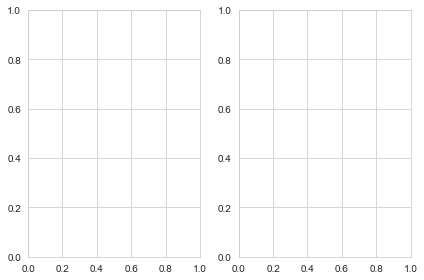

In [170]:
sentiment= sns.lineplot(x="year",y="positive_words", hue='Republican', data=df2, palette = ['blue', 'red'], ax=axes[0])
sentiment= sns.lineplot(x="year",y="negative_words", hue='Republican', data=df2, palette = ['blue', 'red'], ax=axes[1])
#plt.title("Sentiment: ratio of both negative and positive words for republicans and democrats, 1853-2019")
#plt.ylabel("")

#timeline.set_xticklabels(rotation=90)
#plt.title("Year wise Speech Length")
#plt.ylabel("")
fig, axes = plt.subplots(nrows=1, ncols=2)
#axes[0].plot(x1, y1)
#axes[1].plot(x2, y2)
fig.tight_layout()


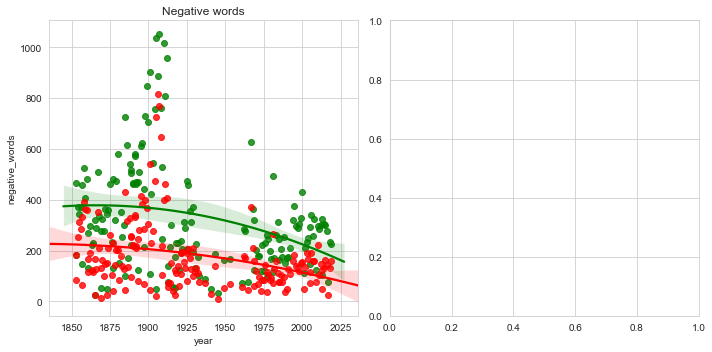

In [171]:
fig, axes =plt.subplots(1,2, figsize=(10,5))

#sns.regplot(x=iris['sepal_length'],y=iris['petal_length'], order=2, ax=axes[0]).set_title('Iris')
sns.regplot(x=df2['year'],y=df2['positive_words'], order=2, ax=axes[0], color='green').set_title('Positive words')
sns.regplot(x=df2['year'],y=df2['negative_words'], order=2, ax=axes[0], color='red').set_title('Negative words')
plt.tight_layout()
axes[1].set_ylim([0,1])
fig.savefig('plotE.png')

## Positive and negative words ratio

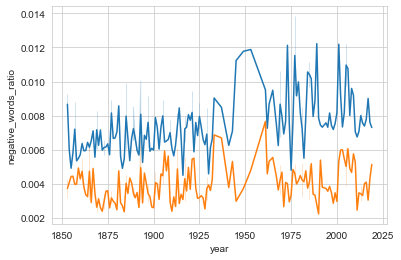

Text(0, 0.5, '')

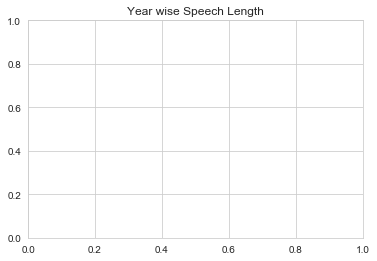

In [172]:
# plotting positive and negative words ratios against each other 
#import seaborn as sns; sns.set_style("whitegrid")
import matplotlib.pyplot as plt

#fig, ax1 = plt.subplots(1,1)

#ax1.set_xlim(1853,2019)
#ax1.set_ylim(0, 0.014)

sentiment_m = sns.lineplot(x="year",y="positive_words_ratio", palette=['green'], data=df2)
sentiment_m = sns.lineplot(x="year",y="negative_words_ratio", palette=['red'], data=df2)
plt.show()

timeline.set_xticklabels(rotation=90)
plt.title("Year wise Speech Length")
plt.ylabel("")



## Sentiment analysis using VADER

In [59]:
#!pip install vaderSentiment

In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [61]:
# using polarity_scores() to obtain the polarity indices for given sentence
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [62]:
# THIS TAKES A LONG TIME RUNNING, SO DON'T RUN IT JUST FOR FUN

# This doesn't work as well as the code below, but we might have
# to find a way to do a function that applies the VADER to
# every single row... if that isn't what we are doing below.

# applying the sentiment_analyzer function
vader_sent = df2['Speech'].apply(sentiment_analyzer_scores)


      
      
Madam Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans:

We meet tonight at a moment of unlimited potential. As we begin a new Congress, I stand here ready to work with you to achieve historic breakthroughs for all Americans.

Millions of our fellow citizens are watching us now, gathered in this great chamber, hoping that we will govern not as two parties but as one Nation.

The agenda I will lay out this evening is not a Republican agenda or a Democrat agenda. It is the agenda of the American people.

Many of us campaigned on the same core promises: to defend American jobs and demand fair trade for American workers; to rebuild and revitalize our Nation’s infrastructure; to reduce the price of healthcare and prescription drugs; to create an immigration system that is safe, lawful, modern, and secure; and to pursue a foreign policy that puts America’s interests first.

There is a new opportunity in American pol


      
      Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans:

Less than 1 year has passed since I first stood at this podium, in this majestic chamber, to speak on behalf of the American People—and to address their concerns, their hopes, and their dreams. That night, our new Administration had already taken swift action. A new tide of optimism was already sweeping across our land.

Each day since, we have gone forward with a clear vision and a righteous mission—to make America great again for all Americans.

Over the last year, we have made incredible progress and achieved extraordinary success. We have faced challenges we expected, and others we could never have imagined. We have shared in the heights of victory and the pains of hardship. We endured floods and fires and storms. But through it all, we have seen the beauty of America’s soul, and the steel in America’s spine.

Each test has forged new American heroes to

     {'neg': 0.072, 'neu': 0.711, 'pos': 0.217, 'compound': 0.9998}

      
      Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:

Tonight marks the eighth year that I’ve come here to report on the State of the Union. And for this final one, I’m going to try to make it a little shorter. (Applause.) I know some of you are antsy to get back to Iowa. (Laughter.) I've been there. I'll be shaking hands afterwards if you want some tips. (Laughter.)

And I understand that because it’s an election season, expectations for what we will achieve this year are low. But, Mr. Speaker, I appreciate the constructive approach that you and the other leaderstook at the end of last year to pass a budget and make tax cuts permanent for working families. So I hope we can work together this year on some bipartisan priorities like criminal justice reform -- (applause) -- and helping people who are battling prescription drug abuse and heroin abuse. (Applause.) So, who knows, we might


      
      Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:
 
We are 15 years into this new century.  Fifteen years that dawned with terror touching our shores; that unfolded with a new generation fighting two long and costly wars; that saw a vicious recession spread across our nation and the world.  It has been, and still is, a hard time for many. 
 
But tonight, we turn the page.  Tonight, after a breakthrough year for America, our economy is growing and creating jobs at the fastest pace since 1999.  (Applause.)  Our unemployment rate is now lower than it was before the financial crisis.  More of our kids are graduating than ever before.  More of our people are insured than ever before.  (Applause.)  And we are as free from the grip of foreign oil as we’ve been in almost 30 years.  (Applause.)
 
Tonight, for the first time since 9/11, our combat mission in Afghanistan is over.  (Applause.)  Six years ago, nearly 180,000 American troops served in Iraq and 


      
      Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:

Today in America, a teacher spent extra time with a student who needed it, and did her part to lift America’s graduation rate to its highest level in more than three decades.

An entrepreneur flipped on the lights in her tech startup, and did her part to add to the more than eight million new jobs our businesses have created over the past four years. 

An autoworker fine-tuned some of the best, most fuel-efficient cars in the world, and did his part to help America wean itself off foreign oil.

A farmer prepared for the spring after the strongest five-year stretch of farm exports in our history.  A rural doctor gave a young child the first prescription to treat asthma that his mother could afford.  A man took the bus home from the graveyard shift, bone-tired but dreaming big dreams for his son.  And in tight-knit communities across America, fathers and mothers will tuck in their kids, put an arm a


      
      
Mr. Speaker, Mr. Vice President, members of Congress, fellow citizens:  
 
Fifty-one years ago, John F. Kennedy declared to this chamber that “the Constitution makes us not rivals for power but partners for progress.”  (Applause.) “It is my task,” he said, “to report the State of the Union -- to improve it is the task of us all.”  
 
Tonight, thanks to the grit and determination of the American people, there is much progress to report.  After a decade of grinding war, our brave men and women in uniform are coming home.  (Applause.)  After years of grueling recession, our businesses have created over six million new jobs.  We buy more American cars than we have in five years, and less foreign oil than we have in 20.  (Applause.)  Our housing market is healing, our stock market is rebounding, and consumers, patients, and homeowners enjoy stronger protections than ever before.  (Applause.)  
 
So, together, we have cleared away the rubble of crisis, and we can say with rene


      
      
Vice President Biden, Mr. Chief Justice,
members of the United States Congress, distinguished guests, and fellow citizens:  
 
Each time we gather to inaugurate a President we bear witness to the enduring strength of our Constitution.  We affirm the promise of our democracy.  We recall that what binds this nation together is not the colors of our skin or the tenets of our faith or the origins of our names.  What makes us exceptional -- what makes us American -- is our allegiance to an idea articulated in a declaration made more than two centuries ago:
“We hold these truths to be self-evident, that all men are created equal; that they are endowed by their Creator with certain unalienable rights; that among these are life, liberty, and the pursuit of happiness.”  
 
Today we continue a never-ending journey to bridge the meaning of those words with the realities of our time.  For history tells us that while these truths may be self-evident, they’ve never been self-executing


      
       Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests, and fellow Americans:

Last month, I went to Andrews Air Force Base and welcomed home some of our last troops to serve in Iraq.  Together, we offered a final, proud salute to the colors under which more than a million of our fellow citizens fought -- and several thousand gave their lives.

We gather tonight knowing that this generation of heroes has made the United States safer and more respected around the world.  (Applause.)  For the first time in nine years, there are no Americans fighting in Iraq.  (Applause.)  For the first time in two decades, Osama bin Laden is not a threat to this country.  (Applause.)  Most of al Qaeda’s top lieutenants have been defeated.  The Taliban’s momentum has been broken, and some troops in Afghanistan have begun to come home.

These achievements are a testament to the courage, selflessness and teamwork of America’s Armed Forces.  At a time when too many of our i


      
      Mr. Speaker, Mr. Vice President, members of Congress, distinguished guests, and fellow Americans:

      Tonight I want to begin by congratulating the men and women of the 112th Congress, as well as your new Speaker, John Boehner.  (Applause.)  And as we mark this occasion, we’re also mindful of the empty chair in this chamber, and we pray for the health of our colleague -- and our friend -– Gabby Giffords.  (Applause.)

      It’s no secret that those of us here tonight have had our differences over the last two years.  The debates have been contentious; we have fought fiercely for our beliefs.  And that’s a good thing.  That’s what a robust democracy demands.  That’s what helps set us apart as a nation.

      But there’s a reason the tragedy in Tucson gave us pause. Amid all the noise and passion and rancor of our public debate, Tucson reminded us that no matter who we are or where we come from, each of us is a part of something greater -– something more consequential 

KeyboardInterrupt: 

In [ ]:
# THIS TAKES A LONG TIME RUNNING, SO DON'T RUN IT JUST FOR FUN

# applying the sentiment_analyzer function
vader_sent = df2['Speech'].apply(sentiment_analyzer_scores)

In [ ]:
vader_sent_df1 = pd.DataFrame(vader_sent1.tolist())
vader_sent_df1.head()

In [54]:
# A TRY AT THE VADER IMPLEMENTATION. DIDN'T WORK.

#def nltk_sentiment(sentence):
 #   from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
 #   nltk_sentiment = SentimentIntensityAnalyzer()
 #   score = nltk_sentiment.polarity_scores(sentence)
 #   return score

In [ ]:
#nltk_results = [nltk_sentiment(row) for row in df2]
#results_df = pd.DataFrame(nltk_results)
#text_df = pd.DataFrame(df2, columns=['Speech'])
#nltk_df = text_df.join(results_df)
#nltk_df

In [ ]:
average=sum(len(word) for word in words) /len(words)
average 



In [ ]:
def main():
    wordCount=0
    letterCount=0
    
    for word in words: 
        letterCount=letterCount+len(word)
        wordCount=wordCount+1
    print("Average word length",letterCount/wordCount)
main()
